In [12]:
# Random Forest Regression for Predicting siRNA activity for Heusken dataset of siRNAs

# Train model on the training set
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr 
from scipy.stats.stats import spearmanr

trainfile = 'training_features_check.csv'
testfile = 'test_features_check.csv'


all_data = np.loadtxt(trainfile, delimiter=',', dtype=str, comments=None) # All of the training features, including the feature names
headers = all_data[0,:]

feature_list = headers[0:len(headers)-2] # Skip the last two columns, which correspond to the activity and potency labels, respectively.
feature_list = feature_list.tolist()
train_data = all_data[1:,0:len(headers)].astype(float) # All the data (including the activity and potency labels)

r1,c1 = np.shape(train_data)
print ("r1 = ", r1, ", c1 = ", c1)
train_labels = train_data[:,c1-2] # The activity column
train_features = train_data[:,0:c1-2] # All columns except the last 2 that correspond to activity and potency

num_jobs = -1 # Change this based on the number of parallel processes you need. -1 means use all the available processors.
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=num_jobs)

rf.fit(train_features, train_labels)

predictions = rf.predict(test_features)

# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

   

r1 =  2182 , c1 =  561
Variable: U1                   Importance: 0.1263
Variable: A1                   Importance: 0.0647
Variable: GC content           Importance: 0.0404
Variable: ENERGY               Importance: 0.0302
Variable: A19                  Importance: 0.0266
Variable: PSSM_SCORE           Importance: 0.02
Variable: C_DNA                Importance: 0.0128
Variable: U19                  Importance: 0.0113
Variable: TG_DNA               Importance: 0.0085
Variable: A18                  Importance: 0.0081
Variable: U                    Importance: 0.0077
Variable: G                    Importance: 0.0074
Variable: C                    Importance: 0.0071
Variable: GGC                  Importance: 0.0068
Variable: G2                   Importance: 0.0068
Variable: C2                   Importance: 0.0062
Variable: A                    Importance: 0.0061
Variable: AC                   Importance: 0.0061
Variable: U2                   Importance: 0.0061
Variable: C18                

PCC with all features: (0.6362484732001227, 1.1715912222644469e-29)
SCC with all features: SpearmanrResult(correlation=0.6420815712495848, pvalue=2.447315076649612e-30)
MSE =  0.028316457831325303


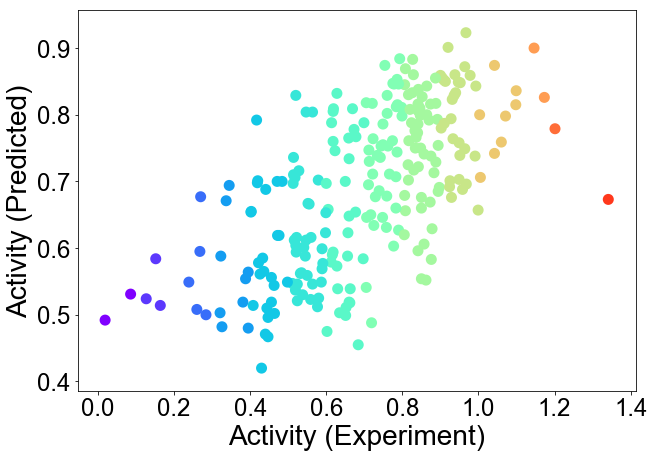

In [13]:
# Run predictions for the test dataset
test_data = np.loadtxt(testfile, delimiter=',', skiprows=1, dtype=float)
r2,c2 = np.shape(test_data)

test_labels = test_data[:,c2-2] # The activity column
test_features = test_data[:,0:c2-2] 

predictions = rf.predict(test_features)
predictions = predictions.round(3)

plt.figure(figsize=(10,7))
colors = plt.cm.rainbow(np.linspace(0,1,15))
colors_sorted = []
for i in range(0,len(test_labels)):
    act = test_labels[i]
    act_i = int(np.floor(act*10))
    colors_sorted.append(colors[act_i])

plt.scatter(test_labels, predictions, c=colors_sorted, lw=5)
plt.xticks(fontsize=24,fontname='Arial')
plt.yticks(fontsize=24,fontname='Arial')
plt.xlabel('Activity (Experiment)', fontsize=28, fontname='Arial')
plt.ylabel('Activity (Predicted)', fontsize=28, fontname='Arial')

pcc = pearsonr(test_labels, predictions)
scc = spearmanr(test_labels, predictions)
print("PCC with all features:", pcc)
print("SCC with all features:", scc)
print("MSE = ", mean_squared_error(test_labels, predictions))
    

In [33]:
# Get the Pearson correlation coefficient (PCC) and Spearman correlation coefficient (SCC) for the top N important features
important_indices = np.argsort(np.array(importances))[::-1]
plt.figure()
PCC_list = []
SCC_list = []
top_max = 559
for n_feat in range(1,top_max+1):
    print ("Running predictions with top ", n_feat, " important feature(s)...", end='')
    train_important = train_features[:, important_indices[0:n_feat]]
    test_important = test_features[:, important_indices[0:n_feat]]
    rf.fit(train_important, train_labels)
    predictions = rf.predict(test_important)
    pcc = pearsonr(test_labels, predictions)
    scc = spearmanr(test_labels, predictions)
    PCC_list.append(pcc)
    SCC_list.append(scc)
    print("Done!")

Running predictions with top  1  important feature(s)...Done!
Running predictions with top  2  important feature(s)...Done!
Running predictions with top  3  important feature(s)...Done!
Running predictions with top  4  important feature(s)...Done!
Running predictions with top  5  important feature(s)...Done!
Running predictions with top  6  important feature(s)...Done!
Running predictions with top  7  important feature(s)...Done!
Running predictions with top  8  important feature(s)...Done!
Running predictions with top  9  important feature(s)...Done!
Running predictions with top  10  important feature(s)...Done!
Running predictions with top  11  important feature(s)...Done!
Running predictions with top  12  important feature(s)...Done!
Running predictions with top  13  important feature(s)...Done!
Running predictions with top  14  important feature(s)...Done!
Running predictions with top  15  important feature(s)...Done!
Running predictions with top  16  important feature(s)...Done!
R

Running predictions with top  130  important feature(s)...Done!
Running predictions with top  131  important feature(s)...Done!
Running predictions with top  132  important feature(s)...Done!
Running predictions with top  133  important feature(s)...Done!
Running predictions with top  134  important feature(s)...Done!
Running predictions with top  135  important feature(s)...Done!
Running predictions with top  136  important feature(s)...Done!
Running predictions with top  137  important feature(s)...Done!
Running predictions with top  138  important feature(s)...Done!
Running predictions with top  139  important feature(s)...Done!
Running predictions with top  140  important feature(s)...Done!
Running predictions with top  141  important feature(s)...Done!
Running predictions with top  142  important feature(s)...Done!
Running predictions with top  143  important feature(s)...Done!
Running predictions with top  144  important feature(s)...Done!
Running predictions with top  145  impor

Running predictions with top  258  important feature(s)...Done!
Running predictions with top  259  important feature(s)...Done!
Running predictions with top  260  important feature(s)...Done!
Running predictions with top  261  important feature(s)...Done!
Running predictions with top  262  important feature(s)...Done!
Running predictions with top  263  important feature(s)...Done!
Running predictions with top  264  important feature(s)...Done!
Running predictions with top  265  important feature(s)...Done!
Running predictions with top  266  important feature(s)...Done!
Running predictions with top  267  important feature(s)...Done!
Running predictions with top  268  important feature(s)...Done!
Running predictions with top  269  important feature(s)...Done!
Running predictions with top  270  important feature(s)...Done!
Running predictions with top  271  important feature(s)...Done!
Running predictions with top  272  important feature(s)...Done!
Running predictions with top  273  impor

Running predictions with top  386  important feature(s)...Done!
Running predictions with top  387  important feature(s)...Done!
Running predictions with top  388  important feature(s)...Done!
Running predictions with top  389  important feature(s)...Done!
Running predictions with top  390  important feature(s)...Done!
Running predictions with top  391  important feature(s)...Done!
Running predictions with top  392  important feature(s)...Done!
Running predictions with top  393  important feature(s)...Done!
Running predictions with top  394  important feature(s)...Done!
Running predictions with top  395  important feature(s)...Done!
Running predictions with top  396  important feature(s)...Done!
Running predictions with top  397  important feature(s)...Done!
Running predictions with top  398  important feature(s)...Done!
Running predictions with top  399  important feature(s)...Done!
Running predictions with top  400  important feature(s)...Done!
Running predictions with top  401  impor

Running predictions with top  514  important feature(s)...Done!
Running predictions with top  515  important feature(s)...Done!
Running predictions with top  516  important feature(s)...Done!
Running predictions with top  517  important feature(s)...Done!
Running predictions with top  518  important feature(s)...Done!
Running predictions with top  519  important feature(s)...Done!
Running predictions with top  520  important feature(s)...Done!
Running predictions with top  521  important feature(s)...Done!
Running predictions with top  522  important feature(s)...Done!
Running predictions with top  523  important feature(s)...Done!
Running predictions with top  524  important feature(s)...Done!
Running predictions with top  525  important feature(s)...Done!
Running predictions with top  526  important feature(s)...Done!
Running predictions with top  527  important feature(s)...Done!
Running predictions with top  528  important feature(s)...Done!
Running predictions with top  529  impor

<Figure size 432x288 with 0 Axes>

Maximum Pearson correlation:  0.6677385818643313
Maximum Spearman correaltion:  0.6828898454421196
Maximum PCC observed with 31 features!


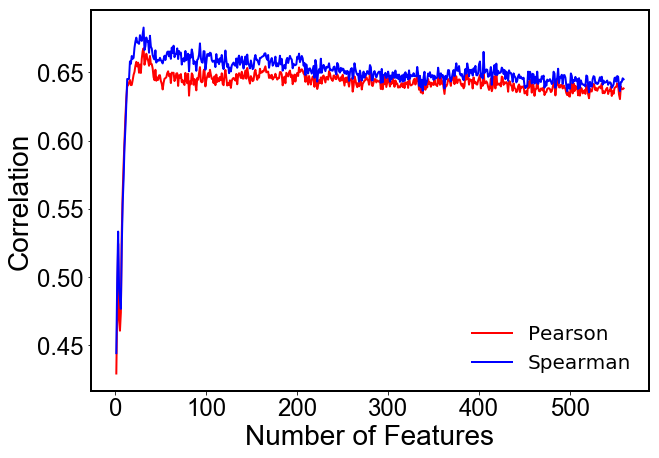

In [36]:
# Plot the PCCs and SCCs for the top 100 features

PCC_list_new = [list(i)[0] for i in PCC_list]
SCC_list_new = [list(i)[0] for i in SCC_list]
plt.figure(figsize=(10,7))
plt.plot(list(range(1,len(PCC_list_new)+1)), PCC_list_new, 'r', label='Pearson', lw=2)
plt.plot(list(range(1,len(SCC_list_new)+1)), SCC_list_new, 'b', label='Spearman', lw=2)
plt.xticks(fontsize=24,fontname='Arial')
plt.yticks(fontsize=24,fontname='Arial')
plt.xlabel('Number of Features', fontsize=28, fontname='Arial')
plt.ylabel('Correlation', fontsize=28, fontname='Arial')
plt.legend(frameon=False, fontsize=20)

print("Maximum Pearson correlation: ", max(PCC_list_new[0:len(PCC_list_new)]))
print("Maximum Spearman correaltion: ",max(SCC_list_new[0:len(PCC_list_new)]))
print("Maximum PCC observed with", PCC_list_new.index(max(PCC_list_new[0:len(PCC_list_new)])) + 1, "features!" )

PCC= 0.6677385818643312 , SCC= 0.6828898454421196 , MSE= 0.02614195138955823


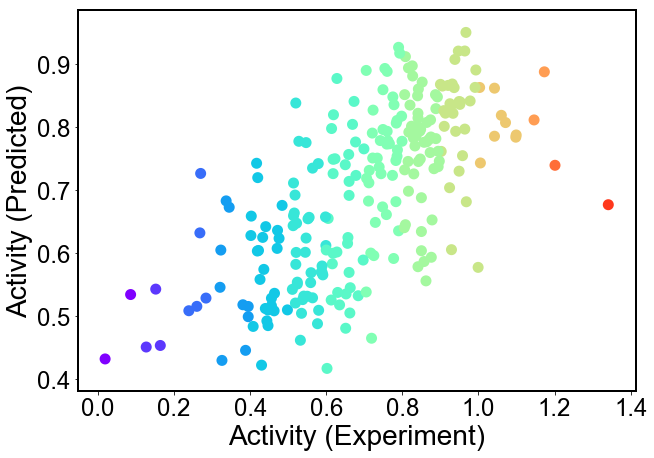

In [37]:
# Run predictions with Top 31 features
train_important = train_features[:, important_indices[0:31]]
test_important = test_features[:, important_indices[0:31]]
rf.fit(train_important, train_labels)
predictions = rf.predict(test_important)
plt.figure(figsize=(10,7))
colors = plt.cm.rainbow(np.linspace(0,1,15))
colors_sorted = []
for i in range(0,len(test_labels)):
    act = test_labels[i]
    act_i = int(np.floor(act*10))
    #print(act_i)
    colors_sorted.append(colors[act_i])

plt.scatter(test_labels, predictions, c=colors_sorted, lw=5)
plt.xticks(fontsize=24,fontname='Arial')
plt.yticks(fontsize=24,fontname='Arial')
plt.xlabel('Activity (Experiment)', fontsize=28, fontname='Arial')
plt.ylabel('Activity (Predicted)', fontsize=28, fontname='Arial')
plt.savefig('Correlation_plot_top_31.png', dpi=300)
pcc = pearsonr(test_labels, predictions)
scc = spearmanr(test_labels, predictions)
print("PCC=", pcc[0], ", SCC=", scc[0], ", MSE=", mean_squared_error(test_labels, predictions))

U1 : 1.0
A1 : 0.5123109809199589
GC content : 0.3201646742142348
ENERGY : 0.23893595123109806
A19 : 0.21035547462592036
PSSM_SCORE : 0.15865727179162376
C_DNA : 0.1012588076953527
U19 : 0.08977911487609848
TG_DNA : 0.06737392130472647
A18 : 0.0638904283112976
U : 0.06088195708969994
G : 0.058348507639933496
C : 0.05636925025730345
GGC : 0.053756630512231805
G2 : 0.053519119626316204
C2 : 0.04940226427044572
C18 : 0.04868973161269891
U2 : 0.048452220726783304
A : 0.0480563692502573
AC : 0.0479771989549521
C19 : 0.046235452458237666
G14 : 0.04536457920988045
UC : 0.04235610798828279
GG : 0.03657667643100308
UAA : 0.03570580318264587
UG : 0.035547462592035464
AU : 0.034518248753067846
CA : 0.034439078457762645
C7 : 0.03340986461879503
A2 : 0.03238065077982741
UA : 0.031826458712691


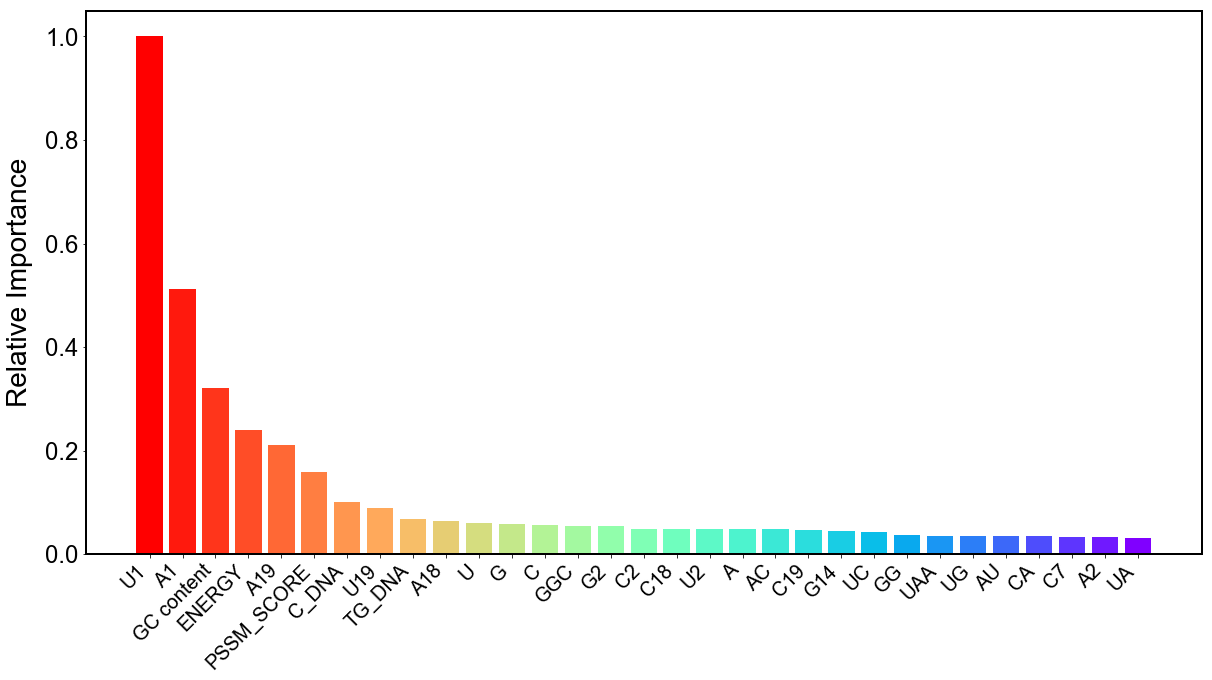

In [29]:
# Print the top N important features and their importances

import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 2

top_n_features = np.array(feature_list)[important_indices[0:31]].tolist()


top_n_importances = np.array(importances)[important_indices[0:31]].tolist()
top_n_importances = [round(imp_i,5) for imp_i in top_n_importances]
top_n_importances = [top_i/max(top_n_importances) for top_i in top_n_importances]
[print (f + ' : ' + str(im)) for f,im in zip(top_n_features,top_n_importances)]
#print(top_n_importances) # uncomment this to see the raw importance scores
colors = plt.cm.rainbow_r(np.linspace(0,1,len(top_n_features)))

plt.figure(figsize=(20,10))  
plt.bar(list(range(1,32)),top_n_importances, color=colors)
plt.xticks(list(range(1,len(top_n_features)+1)), top_n_features, rotation=45, fontsize=20, fontname='Arial', ha="right")
plt.yticks(fontsize=24, fontname='Arial')
plt.ylabel('Relative Importance', fontsize=28, fontname='Arial', labelpad=12)
plt.savefig('Regression_top_31_features.png',  dpi=300)